# Problem 2

## Problem Statement

Time for a bit of SciFi in the SciComp course!

We’ll be modelling a Zombie apocalypse. The system is modelled by the following equations:

1. dS/dt = P - BSZ - nS
2. dZ/dt = BSZ + GR - ASZ
3. dR/dt = nS + ASZ - GR

where the variables involved are:

1. S: the number of susceptible victims
2. Z: the number of zombies
3. R: the number of people "killed"
4. P: the population birth rate
5. n: the chance of a natural death
6. B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
7. G: the chance a dead person is resurrected into a zombie
8. A: the chance a zombie is totally destroyed

Take the following values for the constants:

1. P = 0
2. n = 0.0001
3. B = 0.0095
4. G = 0.0001
5. A = 0.0001

Take the initial populations as: S = 500, Z = 0 and R = 0.

Plot for the first 5 days after the zombie apocalypse starts: t = np.linspace(0, 5, 1000).

## Solution:

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(y, t, P, n, B, G, A):
    S, Z, R = y
    
    dSdt = P - B*S*Z - n*S
    dZdt = B*S*Z + G*R - A*S*Z
    dRdt = n*S + A*S*Z - G*R
    
    return [dSdt, dZdt, dRdt]

In [3]:
S0 = 500
Z0 = 0
R0 = 0

t = np.linspace(0, 5, 1000)

y = odeint(model, [S0, Z0, R0], t, args=(0, 1e-4, 9.5e-3, 1e-4, 1e-4))

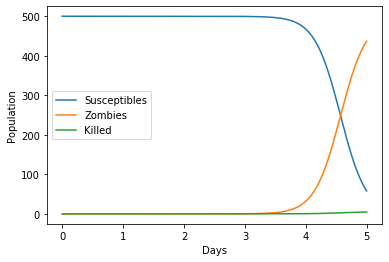

In [4]:
plt.plot(t, y[:, 0], label='Susceptibles')
plt.plot(t, y[:, 1], label='Zombies')
plt.plot(t, y[:, 2], label='Killed')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()